## Домашнее задание 9
### Градиентный бустинг

В данном домашнем задании мы изучим применение градиентного бустинга для решения реальных задач.
  
Мы будем использовать данные об аренде квартир сервиса Яндекс.Недвижимость: по информации из объявления предсказывать время его экспозиции на сервисе.  

Метрикой качества для в данном задании является средняя абсолютная ошибка, MAE.

In [ ]:
! wget https://www.dropbox.com/s/psutl0zafq50828/data.tsv > ./data.tsv

--2021-12-21 03:45:52--  https://www.dropbox.com/s/psutl0zafq50828/data.tsv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/psutl0zafq50828/data.tsv [following]
--2021-12-21 03:45:52--  https://www.dropbox.com/s/raw/psutl0zafq50828/data.tsv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc03c742fd98f1e6300cf42f0fe5.dl.dropboxusercontent.com/cd/0/inline/BcOUaE2Ki78DttXbUs58BUUWK0sBtL7DMcEhBud329-2MPkuY-R9WEpIbrkiVQMQ3OAEwQuscE-FuH0Zqf0561lAfITdhmg8B3tXaK2KXXlM2pD2Y8I4UuUUWizhTW2OfAUeSHcmuDYzt3gjPcytz0_o/file# [following]
--2021-12-21 03:45:52--  https://uc03c742fd98f1e6300cf42f0fe5.dl.dropboxusercontent.com/cd/0/inline/BcOUaE2Ki78DttXbUs58BUUWK0sBtL7DMcEhBud329-2MPkuY-R9WEpIbrkiVQMQ3OAEwQuscE-FuH0Zqf0561lAfITdhmg8B3tXaK

In [ ]:
! pip install catboost==0.22
! pip install lightgbm==2.3.1

     |████████████████████████████████| 64.4 MB 34 kB/s 
     |████████████████████████████████| 1.2 MB 7.0 MB/s 
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


In [ ]:
import pandas as pd
import catboost
import lightgbm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

data = pd.read_csv('data.tsv.1', sep='\t')
num_features = ['agent_fee', 'floor', 'floors_total', 'kitchen_area', 'living_area', 'price', 'rooms_offered', 'total_area', 'total_images']
cat_features = ['balcony', 'building_type', 'month', 'renovation', 'studio']

X_train, X_test, y_train, y_test = train_test_split(data[num_features+cat_features], data['exposition_time'], test_size=0.3, shuffle=False)

__Задание 1.__

Обучите реализации градиентного бустинга LightGBM и Catboost на **вещественных** признаках без подбора параметров. Сделайте предсказания для тестовой выборки, посчитайте MAE. Выведите модуль разности между значениями метрик LightGBM и Catboost. Ответ округлите до тысячных.

В этом и последующих экспериментах советуем измерять время обучения моделей.

In [ ]:
%%time

cb = catboost.CatBoostRegressor(random_seed=0)
cb = cb.fit(X_train[num_features], y_train)

Learning rate set to 0.100083
0:	learn: 82.6499469	total: 121ms	remaining: 2m
1:	learn: 82.3368081	total: 195ms	remaining: 1m 37s
2:	learn: 82.0661517	total: 250ms	remaining: 1m 23s
3:	learn: 81.8512495	total: 282ms	remaining: 1m 10s
4:	learn: 81.6824372	total: 314ms	remaining: 1m 2s
5:	learn: 81.5239824	total: 346ms	remaining: 57.4s
6:	learn: 81.3974308	total: 380ms	remaining: 53.9s
7:	learn: 81.3035215	total: 416ms	remaining: 51.6s
8:	learn: 81.2044516	total: 456ms	remaining: 50.2s
9:	learn: 81.1124853	total: 488ms	remaining: 48.4s
10:	learn: 81.0335233	total: 521ms	remaining: 46.9s
11:	learn: 80.9804140	total: 554ms	remaining: 45.6s
12:	learn: 80.9353553	total: 590ms	remaining: 44.8s
13:	learn: 80.8969679	total: 634ms	remaining: 44.7s
14:	learn: 80.8521609	total: 666ms	remaining: 43.7s
15:	learn: 80.8246097	total: 697ms	remaining: 42.8s
16:	learn: 80.7999730	total: 730ms	remaining: 42.2s
17:	learn: 80.7747817	total: 764ms	remaining: 41.7s
18:	learn: 80.7429448	total: 797ms	remaining

In [ ]:
%%time

lgbm = lightgbm.LGBMRegressor(random_state=0).fit(X_train[num_features], y_train)

CPU times: user 2.96 s, sys: 82 ms, total: 3.04 s
Wall time: 2.04 s


In [ ]:
from sklearn.metrics import mean_absolute_error

y_predict_cb = cb.predict(X_test[num_features])
mae_cb = mean_absolute_error(y_test, y_predict_cb)
print("MAE Catboost regressor = %.2f" % mae_cb)

y_predict_lgbm = lgbm.predict(X_test[num_features])
mae_lgbm = mean_absolute_error(y_test, y_predict_lgbm)
print("MAE LightGBM regressor = %.2f" % mae_lgbm)

MAE Catboost regressor = 36.35
MAE LightGBM regressor = 36.50


In [ ]:
print("Модуль разности между метриками MAE для LightLBM и Catboost = %.2f" % abs(mae_cb - mae_lgbm))

Модуль разности между метриками MAE для LightLBM и Catboost = 0.15


__Задание 2.__

Подберите оптимальные параметры для Catboost на вещественных признаках,  используя все доступные комбинации из:

* глубины деревьев {5, 7, 9};
* темпа обучения {0.05, 0.1, 0.5}.

В качестве оптимизируемого функционала в алгоритме используйте MAE (loss_function='MAE'), random_seed=0, другие параметры оставьте без изменений.

Сделайте предсказания для тестовой выборки лучшей моделью, вычислите MAE.

In [ ]:
%%time

param_grid = {'depth': [5, 6, 9],
              'learning_rate': [0.05, 0.1, 0.5]}
cb = catboost.CatBoostRegressor(random_seed=0, loss_function='MAE')
cb = cb.grid_search(param_grid, X_train[num_features], y_train)

0:	loss: 34.4932141	best: 34.4932141 (0)	total: 37.6s	remaining: 5m 1s
1:	loss: 34.5012842	best: 34.4932141 (0)	total: 1m 13s	remaining: 4m 18s
2:	loss: 34.5730549	best: 34.4932141 (0)	total: 1m 49s	remaining: 3m 38s
3:	loss: 34.4841648	best: 34.4841648 (3)	total: 2m 28s	remaining: 3m 5s
4:	loss: 34.4777958	best: 34.4777958 (4)	total: 3m 7s	remaining: 2m 29s
5:	loss: 34.5311632	best: 34.4777958 (4)	total: 3m 45s	remaining: 1m 52s
6:	loss: 34.4795318	best: 34.4777958 (4)	total: 4m 40s	remaining: 1m 20s
7:	loss: 34.4986351	best: 34.4777958 (4)	total: 5m 34s	remaining: 41.8s
8:	loss: 34.5753768	best: 34.4777958 (4)	total: 6m 27s	remaining: 0us
Estimating final quality...
CPU times: user 13min 35s, sys: 43.2 s, total: 14min 19s
Wall time: 10min 11s


In [ ]:
%%time

cb_optimal_depth, cb_optimal_lr = cb['params'].values()
cb_optimal = catboost.CatBoostRegressor(random_seed=0, loss_function='MAE', depth=cb_optimal_depth, learning_rate=cb_optimal_lr)
cb_optimal = cb_optimal.fit(X_train[num_features], y_train)

0:	learn: 38.1393110	total: 51.3ms	remaining: 51.2s
1:	learn: 37.6631930	total: 101ms	remaining: 50.5s
2:	learn: 37.2852475	total: 152ms	remaining: 50.7s
3:	learn: 36.9540210	total: 203ms	remaining: 50.6s
4:	learn: 36.6575021	total: 254ms	remaining: 50.6s
5:	learn: 36.4119481	total: 303ms	remaining: 50.1s
6:	learn: 36.2127669	total: 350ms	remaining: 49.6s
7:	learn: 36.0202264	total: 397ms	remaining: 49.3s
8:	learn: 35.8649664	total: 449ms	remaining: 49.4s
9:	learn: 35.7508495	total: 511ms	remaining: 50.6s
10:	learn: 35.6339013	total: 579ms	remaining: 52.1s
11:	learn: 35.5435193	total: 629ms	remaining: 51.8s
12:	learn: 35.4699379	total: 682ms	remaining: 51.8s
13:	learn: 35.3868423	total: 736ms	remaining: 51.8s
14:	learn: 35.3243664	total: 785ms	remaining: 51.6s
15:	learn: 35.2819207	total: 838ms	remaining: 51.5s
16:	learn: 35.2454115	total: 887ms	remaining: 51.3s
17:	learn: 35.2123109	total: 942ms	remaining: 51.4s
18:	learn: 35.1777831	total: 999ms	remaining: 51.6s
19:	learn: 35.1403645

In [ ]:
y_predict_cb = cb_optimal.predict(X_test[num_features])
mae_cb = mean_absolute_error(y_test, y_predict_cb)
print("MAE Catboost optimal regressor = %.2f" % mae_cb)

MAE Catboost optimal regressor = 31.70


In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

lgbm = lightgbm.LGBMRegressor(random_state=0)

param_grid = {'depth': [5, 6, 9],
              'learning_rate': [0.05, 0.1, 0.5]}

lgbm_cross_validation = GridSearchCV(lgbm, param_grid, scoring='neg_mean_absolute_error')
lgbm_cross_validation = lgbm_cross_validation.fit(X_train[num_features], y_train)

CPU times: user 1min 39s, sys: 1.07 s, total: 1min 41s
Wall time: 53.7 s


In [ ]:
%%time

lgbm_optimal_depth, lgbm_optimal_lr = lgbm_cross_validation.best_params_.values()
lgbm_optimal = lightgbm.LGBMRegressor(random_state=0, max_depth=lgbm_optimal_depth, learning_rate=lgbm_optimal_lr)
lgbm_optimal = lgbm_optimal.fit(X_train[num_features], y_train)

CPU times: user 3.41 s, sys: 11.7 ms, total: 3.42 s
Wall time: 2.41 s


In [ ]:
y_predict_lgbm = lgbm_optimal.predict(X_test[num_features])
mae_lgbm = mean_absolute_error(y_test, y_predict_lgbm)
print("MAE LightGBM optimal regressor = %.2f" % mae_lgbm)

MAE LightGBM optimal regressor = 36.57


__Задание 3.__

Пока что мы использовали только вещественные данные, однако категориальные переменные также могут быть полезны для решения задачи. Перебирая комбинации параметров из предыдущего пункта, используйте все доступные признаки, обрабатывая категориальные встроенным методом Catboost.

Выведите значение MAE на тестовой выборке для лучшей модели.

In [ ]:
cb = catboost.CatBoostRegressor(random_seed=0, loss_function='MAE', cat_features=cat_features)
cb = cb.grid_search(param_grid, X_train, y_train)

0:	loss: 32.1062204	best: 32.1062204 (0)	total: 2m 12s	remaining: 17m 39s
1:	loss: 32.0550623	best: 32.0550623 (1)	total: 4m 23s	remaining: 15m 22s
2:	loss: 32.1985702	best: 32.0550623 (1)	total: 6m 30s	remaining: 13m
3:	loss: 31.9417289	best: 31.9417289 (3)	total: 9m 2s	remaining: 11m 18s
4:	loss: 31.8959904	best: 31.8959904 (4)	total: 11m 33s	remaining: 9m 14s
5:	loss: 32.1902395	best: 31.8959904 (4)	total: 14m 2s	remaining: 7m 1s
6:	loss: 31.7419432	best: 31.7419432 (6)	total: 17m 52s	remaining: 5m 6s
7:	loss: 31.8409527	best: 31.7419432 (6)	total: 21m 35s	remaining: 2m 41s
8:	loss: 32.1573600	best: 31.7419432 (6)	total: 25m 34s	remaining: 0us
Estimating final quality...


In [ ]:
cb_optimal_depth, cb_optimal_lr = cb['params'].values()
cb_optimal = catboost.CatBoostRegressor(random_seed=0, loss_function='MAE', cat_features=cat_features, depth=cb_optimal_depth, learning_rate=cb_optimal_lr)
cb_optimal = cb_optimal.fit(X_train, y_train)

0:	learn: 38.3289322	total: 315ms	remaining: 5m 15s
1:	learn: 37.9162346	total: 573ms	remaining: 4m 46s
2:	learn: 37.5409717	total: 833ms	remaining: 4m 36s
3:	learn: 37.1998020	total: 1.08s	remaining: 4m 28s
4:	learn: 36.8680176	total: 1.35s	remaining: 4m 29s
5:	learn: 36.5750123	total: 1.62s	remaining: 4m 28s
6:	learn: 36.3064088	total: 1.93s	remaining: 4m 34s
7:	learn: 36.0402334	total: 2.17s	remaining: 4m 29s
8:	learn: 35.7973233	total: 2.43s	remaining: 4m 27s
9:	learn: 35.5833996	total: 2.73s	remaining: 4m 30s
10:	learn: 35.3849809	total: 3s	remaining: 4m 30s
11:	learn: 35.1918137	total: 3.3s	remaining: 4m 32s
12:	learn: 35.0195905	total: 3.56s	remaining: 4m 30s
13:	learn: 34.8634217	total: 3.83s	remaining: 4m 30s
14:	learn: 34.7186284	total: 4.12s	remaining: 4m 30s
15:	learn: 34.5812326	total: 4.43s	remaining: 4m 32s
16:	learn: 34.4677483	total: 4.69s	remaining: 4m 31s
17:	learn: 34.3570068	total: 4.94s	remaining: 4m 29s
18:	learn: 34.2356141	total: 5.24s	remaining: 4m 30s
19:	lea

In [ ]:
y_predict_cb = cb_optimal.predict(X_test)
mae_cb = mean_absolute_error(y_test, y_predict_cb)
print("MAE Catboost with categorial feautures optimal regressor = %.2f" % mae_cb)

MAE Catboost with categorial feautures optimal regressor = 34.58


__Задание 4.__

Реализуйте блендинг (получение ответов нескольких моделей и взятие их с весами (их нужно подбирать на обучающей выборке)) полученных в заданиях 2 и 3 моделей и выведите MAE на тестовой выборке.

Обратите внимание: в этом задании нет ограничений на веса у моделей.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import LinearRegression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

__Задание 5.__

В задании 3 вы подобрали гиперпараметры для CatBoost на всех признаках. Визуализируйте их важности в виде горизонтального bar-plot (отсортируйте признаки по убыванию важности, подпишите названия признаков по оси y).

Для каждого из двух алгоритмов удалите неважные признаки (значения менее 0.05; обычно по bar-plot хорошо видно порог, с которого начинается хвост неважных признаков) и обучите модель с теми же параметрами на оставшихся признаках. Выведите разность между значениями MAE на тестовой выборке до и после удаления признаков.

<BarContainer object of 14 artists>

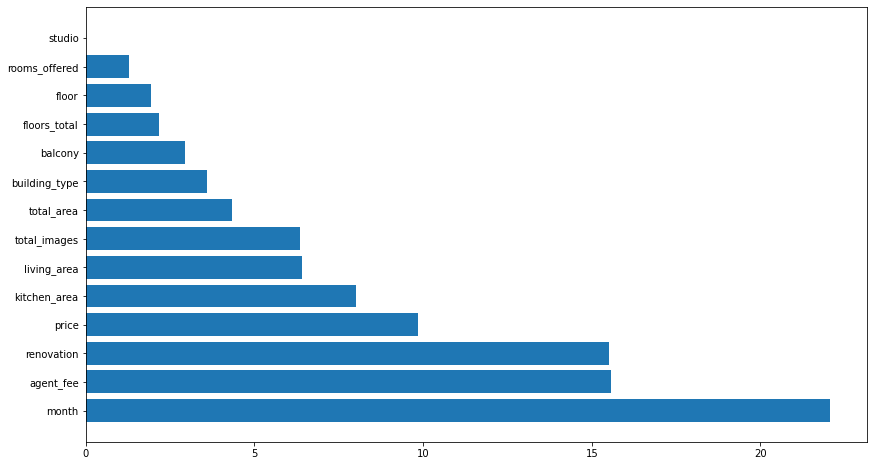

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

feautures_name = num_features+cat_features
features_importance = cb_optimal.get_feature_importance()

sorted_ids = np.argsort(-features_importance)
sorted_names = np.asarray(feautures_name)[sorted_ids]
sorted_importances = features_importance[sorted_ids]

fig = plt.figure(figsize=(14,8))
plt.barh(sorted_names, sorted_importances)

In [ ]:
cat_features = ['balcony', 'building_type', 'month', 'renovation']  # удален признак 'studio'.
X_train, X_test, y_train, y_test = train_test_split(data[num_features+cat_features], data['exposition_time'], test_size=0.3, shuffle=False)

In [ ]:
cb5 = catboost.CatBoostRegressor(random_seed=0, loss_function='MAE', cat_features=cat_features)
cb5 = cb5.grid_search(param_grid, X_train, y_train)

0:	loss: 32.1018723	best: 32.1018723 (0)	total: 2m 12s	remaining: 17m 42s
1:	loss: 32.0568677	best: 32.0568677 (1)	total: 4m 21s	remaining: 15m 16s
2:	loss: 32.1675003	best: 32.0568677 (1)	total: 6m 26s	remaining: 12m 52s
3:	loss: 31.9583801	best: 31.9583801 (3)	total: 9m 51s	remaining: 12m 19s
4:	loss: 31.9447491	best: 31.9447491 (4)	total: 12m 24s	remaining: 9m 55s
5:	loss: 32.1785080	best: 31.9447491 (4)	total: 14m 57s	remaining: 7m 28s
6:	loss: 31.7575237	best: 31.7575237 (6)	total: 18m 45s	remaining: 5m 21s
7:	loss: 31.7873615	best: 31.7575237 (6)	total: 22m 26s	remaining: 2m 48s
8:	loss: 32.1594629	best: 31.7575237 (6)	total: 26m 17s	remaining: 0us
Estimating final quality...


In [ ]:
cb5_optimal_depth, cb5_optimal_lr = cb['params'].values()
cb5_optimal = catboost.CatBoostRegressor(random_seed=0, loss_function='MAE', cat_features=cat_features, depth=cb5_optimal_depth, learning_rate=cb5_optimal_lr)
cb5_optimal = cb5_optimal.fit(X_train, y_train)

0:	learn: 38.2968368	total: 294ms	remaining: 4m 53s
1:	learn: 37.8803263	total: 581ms	remaining: 4m 49s
2:	learn: 37.5204386	total: 854ms	remaining: 4m 43s
3:	learn: 37.1801762	total: 1.12s	remaining: 4m 39s
4:	learn: 36.8691109	total: 1.37s	remaining: 4m 32s
5:	learn: 36.5723293	total: 1.61s	remaining: 4m 26s
6:	learn: 36.2958452	total: 1.88s	remaining: 4m 26s
7:	learn: 36.0608948	total: 2.17s	remaining: 4m 28s
8:	learn: 35.8340059	total: 2.45s	remaining: 4m 29s
9:	learn: 35.6103221	total: 2.68s	remaining: 4m 25s
10:	learn: 35.3952064	total: 2.94s	remaining: 4m 24s
11:	learn: 35.2054369	total: 3.18s	remaining: 4m 22s
12:	learn: 35.0232543	total: 3.42s	remaining: 4m 19s
13:	learn: 34.8655063	total: 3.65s	remaining: 4m 16s
14:	learn: 34.7209754	total: 3.93s	remaining: 4m 18s
15:	learn: 34.5748623	total: 4.21s	remaining: 4m 18s
16:	learn: 34.4515149	total: 4.45s	remaining: 4m 17s
17:	learn: 34.3281882	total: 4.72s	remaining: 4m 17s
18:	learn: 34.2250013	total: 5.04s	remaining: 4m 20s
19:

In [ ]:
y_predict_cb5 = cb5_optimal.predict(X_test)
mae_cb5 = mean_absolute_error(y_test, y_predict_cb5)
print("MAE Catboost with categorial feautures optimal regressor = %.2f" % mae_cb5)
print("MAE difference = %.2f" % (mae_cb5 - mae_cb))

MAE Catboost with categorial feautures optimal regressor = 33.69
MAE difference = -0.89
